# Capstone Group 6: 120 years of olympic historic data¶

<br>
<br>

**Datasets from Kaggle:** https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

**Description:** the dataset consist of 120 year olympic historic data

<br>

**Research questions:**


1. In which year did the Netherlands win the most total medals and the most golden medals <br>
2. Who is the most successfull olympic Dutch female athlete and male athlete (successfull = most total medals)<br>
3. Did the Netherlands win more during the summer or winter olympics? <br>
4. <br>
5. <br>

### Loader: importing libraries

In [19]:
#Any other library we like to use?
import pandas as pd
import numpy as np
#import glob 
import matplotlib.pyplot as plt

### Loader: importing datasets

In [4]:
df1 = pd.read_csv('data\\athlete_events.csv')
df2 = pd.read_csv('data\\noc_regions.csv')

### Loader: merging datasets
- Check the merge: we have 271118 records, so 2 region values extra from df2. <br>
- The two extra records have no athlete information. In the next step we will delete these records

In [5]:
df = pd.merge(df1, df2, how='outer', on=["NOC"])

print(df1.shape)
print(df2.shape)
print(df.shape)
print(df.head(5))


(271116, 15)
(230, 3)
(271118, 17)
       ID           Name Sex   Age  Height  Weight   Team  NOC        Games  \
0     1.0      A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer   
1     2.0       A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer   
2   602.0  Abudoureheman   M  22.0   182.0    75.0  China  CHN  2000 Summer   
3  1463.0      Ai Linuer   M  25.0   160.0    62.0  China  CHN  2004 Summer   
4  1464.0      Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016 Summer   

     Year  Season            City       Sport  \
0  1992.0  Summer       Barcelona  Basketball   
1  2012.0  Summer          London        Judo   
2  2000.0  Summer          Sydney      Boxing   
3  2004.0  Summer          Athina   Wrestling   
4  2016.0  Summer  Rio de Janeiro    Swimming   

                                      Event Medal region notes  
0               Basketball Men's Basketball   NaN  China   NaN  
1              Judo Men's Extra-Lightweight   NaN  China   NaN  


### Preprocesser: scanning the missing values

- Exploration: With the **.info** and the **isnull.sum**, we evaluate the missing values. <br>
- We should check up on Age, Height, Weight, Medal, Region and Notes as well, besides the 2 records that have no atlethe info. 


In [6]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271118 entries, 0 to 271117
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  float64
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271118 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  float64
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270756 non-null  object 
 16  notes   4745 non-null    object 
dtypes: float64(5), object(12)
memory usage: 37.2+ MB
None
ID             2
Name           2
Sex            2
Age         9476
Height     60173
Weight     62877
Team  

### Preprocesser: deleting values

- The 2 records without atlethe info will be deleted
- People without medal will be removed as well

In [7]:
#Records without atlethe info will be deleted
df = df[df.ID.isnull() == False]
df.info()

#Medal options
print(df["Medal"].unique())
#Atlethes that did not win a medal at all will be removed
df = df[df.Medal.isnull() == False]



<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  float64
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  float64
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270756 non-null  object 
 16  notes   4745 non-null    object 
dtypes: float64(5), object(12)
memory usage: 37.2+ MB
[nan 'Silver' 'Bronze' 'Gold']


### Preprocesser: evaluation + replacement 

- Still needs a description

In [8]:
#evaluation the describution of the variables
print(df.describe())

# Fill age with the mean age
df.Age.fillna(df.Age.mean())

# Fill missing length and weight with the median
df.Weight.fillna(df.Weight.median())
df.Height.fillna(df.Height.median())


                  ID           Age        Height        Weight          Year
count   39783.000000  39051.000000  31072.000000  30456.000000  39783.000000
mean    69407.051806     25.925175    177.554197     73.770680   1973.943845
std     38849.980737      5.914026     10.893723     15.016025     33.822857
min         4.000000     10.000000    136.000000     28.000000   1896.000000
25%     36494.000000     22.000000    170.000000     63.000000   1952.000000
50%     68990.000000     25.000000    178.000000     73.000000   1984.000000
75%    103461.500000     29.000000    185.000000     83.000000   2002.000000
max    135563.000000     73.000000    223.000000    182.000000   2016.000000


8         173.0
10        173.0
11        173.0
12        170.0
17        183.0
          ...  
270835    152.0
270841    175.0
270842    175.0
270945    157.0
271042    162.0
Name: Height, Length: 39783, dtype: float64

### Analyzer visual data analysis:

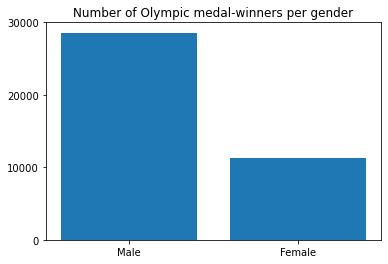

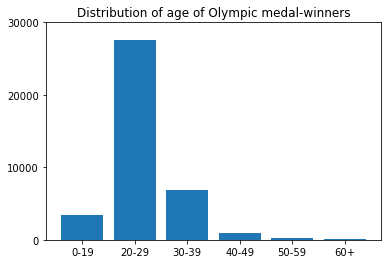

In [120]:
# Gender
sex_values = df.Sex.value_counts()
steps = 10000
maxy = round(max(sex_values)/steps)*steps

plt.figure()
plt.bar(['Male', 'Female'], [sex_values.M, sex_values.F])
plt.yticks(range(0, maxy+1, steps))
plt.title('Number of Olympic medal-winners per gender')
plt.show()

# Age
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60+']
df.Age.describe()
age_cat = pd.cut(df.Age, bins=[0, 19 ,29, 39, 49, 59, 999],
                 labels=age_labels,
                 include_lowest=True)
age_values = age_cat.value_counts(sort=False)
steps = 10000
maxy = round(max(age_values)/steps)*steps

plt.figure()
plt.bar(list(age_values.index), age_values.values)
plt.yticks(range(0, maxy+1, steps))
plt.title('Distribution of age of Olympic medal-winners')
plt.show()

### Analyzer 5 questions: 
<br>
Questions to answer: <br>
1.In which year did the Netherlands win the most total medals and the most golden medals at one olympic event?

In [12]:
# Select only Dutch athletes
df_ned = df[df.region == 'Netherlands']

df_medals = df_ned.groupby(['Year','Season'])['ID'].count()
max_medals = df_medals.max()
year = df_medals[df_medals == max_medals].index[0][0]
print(f'Most medals (n={max_medals}) in the year {int(year)}')

df_goldmedals = df_ned[df.Medal == 'Gold'].groupby(['Year','Season','Medal'])['ID'].count()
max_goldmedals = df_goldmedals.max()
year = df_goldmedals[df_goldmedals == max_goldmedals].index[0][0]
print(f'Most gold medals (n={max_goldmedals}) in the year {int(year)}')

Most medals (n=79) in the year 2000
Most gold medals (n=39) in the year 2008


C:\Users\Annelies\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


2.Who is the most successfull olympic Dutch female athlete and male athlete (successfull = most total medals or most golden medals)

In [13]:
df_medals = df_ned.Name.value_counts()
max_medals = df_medals.max()
athlete = ','.join(df_medals[df_medals == max_medals].index)
print(f'The most succesfull Dutch olympic athlete(s) up to 2016 is {athlete} with {max_medals} total medals.')

df_goldmedals = df_ned[df_ned.Medal == 'Gold'].Name.value_counts()
max_goldmedals = df_goldmedals.max()
athlete = ', '.join(df_goldmedals[df_goldmedals == max_goldmedals].index)
print(f'The most succesfull Dutch olympic athlete(s) up to 2016 is {athlete} with {max_goldmedals} gold medals.')

df_medals_male = df_ned[df_ned.Sex == 'M']
df_medals_female = df_ned[df_ned.Sex == 'F']

for df_ned_sex in [df_medals_male, df_medals_female]:
    df_medals = df_ned_sex.Name.value_counts()
    df_goldmedals = df_ned_sex[df_ned_sex.Medal == 'Gold'].Name.value_counts()
    max_medals = df_medals.max()
    max_goldmedals = df_goldmedals.max()
    athlete = ', '.join(df_medals[df_medals == max_medals].index)
    athlete_gold = ', '.join(df_goldmedals[df_goldmedals == max_goldmedals].index)

    if df_ned_sex['Sex'].max() == 'M':
        sex = 'male'
    else:
        sex = 'female'
    print(f'The most succesfull {sex} Dutch olympic athlete(s) up to 2016 is {athlete} with {max_medals} total medals.')
    print(f'The most succesfull {sex} Dutch olympic athlete(s) up to 2016 is {athlete_gold} with {max_goldmedals} gold medals.')


The most succesfull Dutch olympic athlete(s) up to 2016 is Theodora Elisabeth Gerarda "Anky" van Grunsven with 9 total medals.
The most succesfull Dutch olympic athlete(s) up to 2016 is Inge de Bruijn, Irene Karlijn "Ireen" Wst, Leontine Martha Henrica Petronella "Leontien" Zijlaard-van Moorsel, Charles Ferdinand Pahud de Mortanges, Francina Elsje "Fanny" Blankers-Koen with 4 gold medals.
The most succesfull male Dutch olympic athlete(s) up to 2016 is Pieter Cornelis Martijn van den Hoogenband, Sven Kramer with 7 total medals.
The most succesfull male Dutch olympic athlete(s) up to 2016 is Charles Ferdinand Pahud de Mortanges with 4 gold medals.
The most succesfull female Dutch olympic athlete(s) up to 2016 is Theodora Elisabeth Gerarda "Anky" van Grunsven with 9 total medals.
The most succesfull female Dutch olympic athlete(s) up to 2016 is Francina Elsje "Fanny" Blankers-Koen, Inge de Bruijn, Leontine Martha Henrica Petronella "Leontien" Zijlaard-van Moorsel, Irene Karlijn "Ireen" Ws

3.Did the Netherlands win more during the summer or winter olympics?

In [14]:
df_medals = df_ned.groupby(['Season'])['ID'].count()
df_medals

print(f'The most medals of Dutch olympic athletes were won during the {df_medals[df_medals == df_medals.max()].index[0]} olympic games (namely: {df_medals.max()} medals in total)')

#Corrected for number of olympic games that were performed
summer_indf = len(df.groupby(['Season'])['Year'].unique()['Summer'])
winter_indf = len(df.groupby(['Season'])['Year'].unique()['Winter'])

summer_medals = df_medals['Summer']
winter_medals = df_medals['Winter']

medals_pergame = {'summer': summer_medals/summer_indf, 
                  'winter': winter_medals/winter_indf}
keymax = max(medals_pergame, key=medals_pergame.get) 
print(f'The most medals of Dutch olympic athletes corrected for number of games were won during the {keymax} olympic games (namely: {int(round(medals_pergame[keymax]))} on average per olympic game)')

The most medals of Dutch olympic athletes were won during the Summer olympic games (namely: 918 medals in total)
The most medals of Dutch olympic athletes corrected for number of games were won during the summer olympic games (namely: 32 on average per olympic game)


In [ ]:
4.

In [ ]:
5.